In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Input
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
###### Dont let ML fool you into thinking this was a label prediction problem. This was not.

In [3]:
data_csv = pd.read_csv('C:/Users/hp/Downloads/train.csv')

In [5]:
data = data_csv[:10000].values

In [6]:
data = data[:,1:]/255.0

In [26]:
split = int(0.8*data.shape[0])
X_train = data[:split]
Y_train = data[:split]
print(X_train.shape)
X_test = data[split:]
Y_test = data[split:]

(8000, 784)


In [10]:
Encoder = Sequential()
Encoder.add(Dense(100, input_shape=(784,)))
Encoder.add(Activation('sigmoid'))
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [11]:
Decoder= Sequential()
Decoder.add(Dense(784, input_shape = (100,)))
Decoder.add(Activation('sigmoid'))
Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


In [12]:
AutoEncoder = Sequential([Encoder,Decoder])

In [13]:
AutoEncoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 100)               78500     
_________________________________________________________________
sequential_4 (Sequential)    (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [20]:
AutoEncoder.compile(optimizer='adam',loss='mse',metrics=(['accuracy']))

In [23]:
AutoEncoder.fit(X_train,Y_train,batch_size=10,epochs=10,validation_data=[X_test,Y_test],shuffle=True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 373us/step - loss: 0.0022 - acc: 0.0141 - val_loss: 0.0032 - val_acc: 0.0130
Epoch 2/10
8000/8000 [==============================] - 3s 381us/step - loss: 0.0022 - acc: 0.0138 - val_loss: 0.0032 - val_acc: 0.0095
Epoch 3/10
8000/8000 [==============================] - 3s 376us/step - loss: 0.0022 - acc: 0.0143 - val_loss: 0.0032 - val_acc: 0.0125
Epoch 4/10
8000/8000 [==============================] - 3s 375us/step - loss: 0.0022 - acc: 0.0131 - val_loss: 0.0032 - val_acc: 0.0120
Epoch 5/10
8000/8000 [==============================] - 3s 376us/step - loss: 0.0022 - acc: 0.0133 - val_loss: 0.0032 - val_acc: 0.0110
Epoch 6/10
8000/8000 [==============================] - 3s 394us/step - loss: 0.0022 - acc: 0.0125 - val_loss: 0.0032 - val_acc: 0.0105
Epoch 7/10
8000/8000 [==============================] - 3s 372us/step - loss: 0.0022 - acc: 0.0138 - val_loss: 0.0032 - val_acc: 0.0105


In [16]:
sample = X_train[1]

In [24]:
print(sample)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

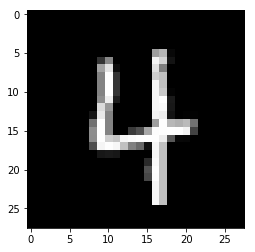

In [46]:

plt.imshow(np.reshape(X_test[5]*255,(28,28)),cmap = 'gray')

In [41]:
out = AutoEncoder.predict(np.array([X_test[5]])) ## Predict function takes input np arrays only

In [42]:
print(out)

[[1.14563867e-04 1.18369382e-04 1.26758430e-04 1.34664791e-04
  1.04155013e-04 1.04162558e-04 9.59182144e-05 1.03042657e-04
  1.06082436e-04 1.19629942e-04 1.32273984e-04 9.56038130e-05
  1.10965724e-04 8.86760608e-05 1.07741827e-04 1.21744772e-04
  1.13997412e-04 1.15625691e-04 1.11414745e-04 1.12243630e-04
  1.39713185e-04 1.03275692e-04 1.03095932e-04 1.15285387e-04
  1.17119860e-04 1.01761143e-04 1.01293430e-04 1.34650545e-04
  1.19566190e-04 1.02235586e-04 1.20657467e-04 1.10011497e-04
  9.51308248e-05 1.07140229e-04 1.84921504e-04 1.17284036e-03
  6.06023183e-04 3.89898865e-04 1.65292446e-03 2.77579093e-04
  1.16849347e-04 7.49045168e-04 3.68821609e-04 5.71699820e-05
  6.38799218e-04 8.48376949e-04 9.64821898e-04 7.49142258e-04
  3.19472211e-03 3.95089388e-04 1.65031612e-04 1.21174584e-04
  9.85062361e-05 1.19461794e-04 1.44422273e-04 9.94445654e-05
  1.33407040e-04 9.53700728e-05 1.08947599e-04 1.26794461e-04
  1.20492019e-04 1.59484174e-04 6.89967826e-04 1.01173716e-02
  1.3164

In [43]:
print(out.shape)

(1, 784)


In [44]:
out = np.array(out*255, dtype=np.uint8)

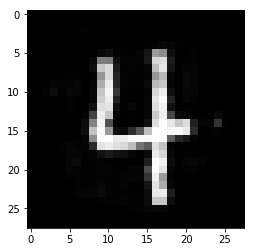

In [45]:
plt.imshow(np.reshape(out,(28,28)),cmap='gray')